# KG measures and clustering tutorial

First, make sure you have networkx installed, here you can find the [documentation](https://networkx.org/documentation/stable/reference/index.html).

In [1]:
## Uncomment if you do not have networkx installed (you should have it installed from the RDFS tutorial)
#import sys
#!{sys.executable} -m pip install networkx

import pandas as pd
import rdflib
from rdflib import Graph, Literal, Namespace, RDF, URIRef, OWL
from rdflib.extras.external_graph_libs import rdflib_to_networkx_digraph
from rdflib.namespace import DC, FOAF
import matplotlib.pyplot as plt
import numpy as np
import networkx.algorithms.community as nx_comm

import networkx as nx
from owlready2 import *

* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


In this tutorial, we will focus on how to characterize an ontology or knowledge graph.

Load the ontology, which you have previously created in the OWL tutorial (load the asserted owl file).

In [2]:


ontology = rdflib.Graph()
ontology.parse("./data/my_music_ontology_inferred.owl")

<Graph identifier=Nf1942fa92cd048ddac9591a7771514bc (<class 'rdflib.graph.Graph'>)>

## 1. Basic (ontology) measures

Let's first focus on calculating basic measures:
* number of classes
* number of properties
* number of individuals
* number of triples
* number of entities (classes, individuals, etc. anything that can be places in the subject possition in a triple/axiom)

We start by counting the number of classes in the ontology. This can be done using a SPARQL query. We want to get the unique classes used in the ontology. 

PREFIX owl: <http://www.w3.org/2002/07/owl#> 
SELECT DISTINCT ?s 
WHERE { ?s rdf:type owl:Class. FILTER isURI(?s) }')

This query gives as all the classes that also have a definition in the ontology. However, this does not have to equal the number of classes actually used by individuals. Hence, you need to be very specific about what the number you are retriving represents.

In [3]:
answer = list(ontology.query(
    'PREFIX owl: <http://www.w3.org/2002/07/owl#> SELECT DISTINCT ?s WHERE { ?s rdf:type owl:Class. FILTER isURI(?s) }'
))
print("Number of classes: {f}".format(f=len(answer)))
for r in answer:
    print(r)


Number of classes: 9
(rdflib.term.URIRef('http://test.org/myonto.owl#Person'),)
(rdflib.term.URIRef('http://test.org/myonto.owl#Artist'),)
(rdflib.term.URIRef('http://test.org/myonto.owl#Location'),)
(rdflib.term.URIRef('http://test.org/myonto.owl#Song'),)
(rdflib.term.URIRef('http://test.org/myonto.owl#Genre'),)
(rdflib.term.URIRef('http://test.org/myonto.owl#Member'),)
(rdflib.term.URIRef('http://test.org/myonto.owl#SoloArtist'),)
(rdflib.term.URIRef('http://test.org/myonto.owl#SubGenre'),)
(rdflib.term.URIRef('http://test.org/myonto.owl#CollaboratingArtist'),)


Even though we used a query, a lot of this information can also be retrieved with owlready2. For example, the number of classes can be retrieved with the function onto.classes(). It returns all classes in the ontology. We try it below.

In [4]:

onto_file = "data/my_music_ontology_inferred.owl"
or_ontology = get_ontology(onto_file).load()
answer = list(or_ontology.classes())

print("Number of classes: {f}".format(f=len(answer)))
for r in answer:
    print(r)

Number of classes: 9
my_music_ontology_inferred.Artist
my_music_ontology_inferred.Song
my_music_ontology_inferred.Location
my_music_ontology_inferred.Genre
my_music_ontology_inferred.Person
my_music_ontology_inferred.Member
my_music_ontology_inferred.SoloArtist
my_music_ontology_inferred.SubGenre
my_music_ontology_inferred.CollaboratingArtist


In [5]:
ind = list(or_ontology.individuals())
print(len(ind))

13


### Exercise 1

Get the following metrics from your ontology, using queries and check your answer using owlready2 functions.

* number of properties
* number of individuals
* number of triples
* number of entities (classes, individuals, etc. anything that can be places in the subject possition in a triple/axiom)

In [6]:
### your code here.

#number of properties
answer = list(ontology.query(
    'PREFIX owl: <http://www.w3.org/2002/07/owl#> SELECT DISTINCT ?s WHERE { ?s rdf:type owl:ObjectProperty. FILTER isURI(?s) }'
))
print("Number of properties: {f}".format(f=len(answer)))
for r in answer:
    print(r)


#number of individuals
answer = list(ontology.query(
    'PREFIX owl: <http://www.w3.org/2002/07/owl#> SELECT DISTINCT ?s WHERE { ?s rdf:type owl:NamedIndividual. FILTER isURI(?s) }'
))
print("Number of Named Individuals: {f}".format(f=len(answer)))
for r in answer:
    print(r)


#numner of triples
answer = list(ontology.query(
    'PREFIX owl: <http://www.w3.org/2002/07/owl#> SELECT ?s WHERE { ?s ?p ?o. FILTER isURI(?s) } '
))
print("Number of Triples: {f}".format(f=len(answer)))
#for r in answer:
#    print(r)


#number of entities aka anything that can be placed in subject position of triples
answer = list(ontology.query(
    'PREFIX owl: <http://www.w3.org/2002/07/owl#> SELECT ?s (count(?s) AS ?count) WHERE { ?s ?p ?o . FILTER isURI(?s) } group by ?s order by desc(?count)'
))
print("Number of entities: {f}".format(f=len(answer)))
for r in answer:
    print(r)





Number of properties: 8
(rdflib.term.URIRef('http://test.org/myonto.owl#authorOf'),)
(rdflib.term.URIRef('http://test.org/myonto.owl#locatedIn'),)
(rdflib.term.URIRef('http://test.org/myonto.owl#hasGenre'),)
(rdflib.term.URIRef('http://test.org/myonto.owl#writtenBy'),)
(rdflib.term.URIRef('http://test.org/myonto.owl#hasFan'),)
(rdflib.term.URIRef('http://test.org/myonto.owl#bandMember'),)
(rdflib.term.URIRef('http://test.org/myonto.owl#collaboratesWith'),)
(rdflib.term.URIRef('http://test.org/myonto.owl#isFanOf'),)
Number of Named Individuals: 13
(rdflib.term.URIRef('http://test.org/myonto.owl#biffy_clyro'),)
(rdflib.term.URIRef('http://test.org/myonto.owl#massive_attack'),)
(rdflib.term.URIRef('http://test.org/myonto.owl#tricky'),)
(rdflib.term.URIRef('http://test.org/myonto.owl#ilaria'),)
(rdflib.term.URIRef('http://test.org/myonto.owl#lise'),)
(rdflib.term.URIRef('http://test.org/myonto.owl#Space'),)
(rdflib.term.URIRef('http://test.org/myonto.owl#United_Kingdom'),)
(rdflib.term.URI

## 2. Converting KGs into Gs

To make use of graph measure, we need to convert our ontology into a mathematical graph networkx.


We first need to remove all the logics before we can do the conversion.
We are interested in keeping the following things:
* individual
* classes
* relationships between individuals and classes

What we need to remove is:
* restrictions
* domain/range
* property definitions

There is two ways for us to do it: we can either remove the information from the existing graph, or create a new graph using only the information we are interested in. Depending on the size and complexity of your knowledge graph, one way will be more preferrable than the other. You also need to consider if you want to keep the inferred information in your graph after conversion or not. Here, we want to keep the inferred information, but that is depended on the task you will then execute (for link prediction, you probably want the uninferred ontology and use the inferred information as a test set)

rdflib comes with a function that lets us convert a rdflib graph into an networkx graph.

In [7]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_digraph
nx_graph = rdflib_to_networkx_digraph(ontology)

list(nx_graph.nodes())

[rdflib.term.URIRef('http://test.org/myonto.owl#ilaria'),
 rdflib.term.URIRef('http://test.org/myonto.owl#biffy_clyro'),
 rdflib.term.BNode('N9957f664203f44ea80741f28ff07f0b7'),
 rdflib.term.Literal('1', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#nonNegativeInteger')),
 rdflib.term.URIRef('http://test.org/myonto.owl#locatedIn'),
 rdflib.term.URIRef('http://test.org/myonto.owl#Location'),
 rdflib.term.BNode('N6c48746ee16c4d7896aa7fc55f0e530a'),
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Restriction'),
 rdflib.term.URIRef('http://test.org/myonto.owl#lise'),
 rdflib.term.URIRef('http://test.org/myonto.owl#massive_attack'),
 rdflib.term.URIRef('http://test.org/myonto.owl#Genre'),
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Thing'),
 rdflib.term.URIRef('http://test.org/myonto.owl#tricky'),
 rdflib.term.URIRef('http://test.org/myonto.owl#SoloArtist'),
 rdflib.term.URIRef('http://test.org/myonto.owl#Scotland'),
 rdflib.term.URIRef('http://test.org/myonto.owl#

As we can see, there are some blank nodes which were covered into the graph that are not very useful for us at this stage. To analyse the graph as a mathematical graph, we don't want the class restrictions or property range and domain definition in our graph, as we are not doing any reasoning anymore.

Often times, it is easier to create a new graph than removeing already modeled information from the graph. Instead of continuing with the ontology, we will create a graph from the metadata provided in 'data/musicoset_metadata', but will adhere to the ontology from before (use the property and class names,etc.)

In [8]:


csv_albums =  pd.read_csv('data/musicoset_metadata/albums.csv',sep='\t')
print(csv_albums.columns)
csv_artists =  pd.read_csv('data/musicoset_metadata/artists.csv',sep='\t')
print(csv_artists.columns)
csv_songs =  pd.read_csv('data/musicoset_metadata/songs.csv',sep='\t')
print(csv_songs.columns)
csv_tracks =  pd.read_csv('data/musicoset_metadata/tracks.csv',sep='\t')
print(csv_tracks.columns)

csv_releases =  pd.read_csv('data/musicoset_metadata/releases.csv',sep='\t')
print(csv_releases.columns)

Index(['album_id', 'name', 'billboard', 'artists', 'popularity',
       'total_tracks', 'album_type', 'image_url'],
      dtype='object')
Index(['artist_id', 'name', 'followers', 'popularity', 'artist_type',
       'main_genre', 'genres', 'image_url'],
      dtype='object')
Index(['song_id', 'song_name', 'billboard', 'artists', 'popularity',
       'explicit', 'song_type'],
      dtype='object')
Index(['song_id', 'album_id', 'track_number', 'release_date',
       'release_date_precision'],
      dtype='object')
Index(['artist_id', 'album_id', 'release_date', 'release_date_precision'], dtype='object')


In [9]:
# We have prepared a simplified ontology to use in this tutorial
# This ontology doesn't have any restrictions or domain/range definitions
# this is to avoid blank nodes when converting to networx
music_onto = rdflib.Graph()
music_onto.parse("data/music_onto_simple.rdf")

nx_music = rdflib_to_networkx_digraph(music_onto)
list(nx_music.nodes())

[rdflib.term.URIRef('http://test.org/myonto.owl#Location'),
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Thing'),
 rdflib.term.URIRef('http://test.org/myonto.owl#SoloArtist'),
 rdflib.term.URIRef('http://test.org/myonto.owl#Person'),
 rdflib.term.URIRef('http://test.org/myonto.owl#CollaboratingArtist'),
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Class'),
 rdflib.term.URIRef('http://test.org/myonto.owl#Member'),
 rdflib.term.URIRef('http://test.org/myonto.owl#bandMember'),
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#ObjectProperty'),
 rdflib.term.URIRef('http://test.org/myonto.owl#Artist'),
 rdflib.term.URIRef('http://test.org/myonto.owl#SubGenre'),
 rdflib.term.URIRef('http://test.org/myonto.owl#Genre'),
 rdflib.term.URIRef('http://test.org/myonto.owl#collaboratesWith'),
 rdflib.term.URIRef('http://test.org/myonto.owl#hasFan'),
 rdflib.term.URIRef('http://test.org/myonto.owl#locatedIn'),
 rdflib.term.URIRef('http://test.org/myonto.owl#Song'),
 rdflib.term.URIRef('h

This ontology no longer produces any blank nodes. So we can now populate it with the metadata loaded from the CSV.

In [10]:
music_onto.parse("data/music_onto_simple.rdf")

EX = rdflib.Namespace("http://test.org/myonto.owl#")
from rdflib import OWL,RDF,RDFS,URIRef
import json
solo_artists = ["singer",'rapper','DJ',]
band = ['band','duo']
undef = ['-']

for index, artist in csv_artists.iterrows():
    art = URIRef(EX,artist["artist_id"])
    if artist["artist_type"] in solo_artists:
        music_onto.add((art,RDF.type,EX.SoloArtist))
    elif artist["artist_type"] in band:
        music_onto.add((art,RDF.type,EX.Band))
    else:
        music_onto.add((art,RDF.type,EX.Artist))
        
    music_onto.add((art,EX.name,Literal(artist["name"])))
    music_onto.add((art,EX.followers,Literal(artist["followers"])))
    genre = URIRef(EX,artist["main_genre"])
    music_onto.add((art,EX.hasGenre,genre))
    music_onto.add((genre,RDF.type,EX.Genre))
    
for index, song in csv_songs.iterrows():
    s = URIRef(EX,song["song_id"])
    music_onto.add((s,RDF.type,EX.Song))
    music_onto.add((s,EX.name,Literal(song['song_name'])))
    artists = eval(song['artists'])
    for key in artists.keys():
        art = URIRef(EX,key)
        music_onto.add((art,EX.authorOf,s))

Feel free to extend your ontology to include albums and track information below. You might have to extend the basic ontology as well with some additional relations.

In [ ]:
#Expanding the ONTOLOGY
EX = rdflib.Namespace("http://test.org/myonto.owl#")
music_onto.add((EX.Album, RDF.type, OWL.Class))
music_onto.add((EX.HasTotalTracks, RDF.type, OWL.ObjectProperty))

#saving new ontology 
nx_music_onto = rdflib_to_networkx_digraph(music_onto)
print(list(nx_music_onto))

#Adding albums and author of relation
for index, album in csv_albums.iterrows():
    alb = URIRef(EX,album["album_id"])
    art =  URIRef(EX,album["artists"])
    music_onto.add((alb, RDF.type, EX.Album))
    music_onto.add((alb,EX.name,Literal(album['name'])))

    music_onto.add((Literal(album['artists']),EX.authorOf, Literal(album['name'])))


#Adding release date to album
for index, album in csv_releases.iterrows():
    alb = URIRef(EX,album["album_id"])
    release_date = URIRef(EX,album["release_date"])
    music_onto.add((alb, EX.releaseDate,Literal(album['release_date'])))


Now we convert the ontology to a networkx graph.

In [12]:

nx_music_graph = rdflib_to_networkx_digraph(music_onto)
#By printing the nodes you can double check your ontology updates
list(nx_music_graph.nodes())

[rdflib.term.URIRef('http://test.org/myonto.owl#'),
 rdflib.term.Literal('402655'),
 rdflib.term.Literal('Johnny Copeland'),
 rdflib.term.Literal('Where Would You Be'),
 rdflib.term.Literal('4861'),
 rdflib.term.Literal('985'),
 rdflib.term.Literal('Only You - Bad Boy Remix'),
 rdflib.term.Literal('Living Together, Growing Together'),
 rdflib.term.Literal("{'7xTKLpo7UCzXSnlH7fOIoM': 'Redman'}"),
 rdflib.term.Literal('Muddy Waters'),
 rdflib.term.Literal("{'4QIJ2i8I6urte2scKgkVoY': 'Rodney Crowell'}"),
 rdflib.term.Literal('Close Ties'),
 rdflib.term.Literal('2011-09-05'),
 rdflib.term.Literal('4285'),
 rdflib.term.Literal('Mirage (Special Bonus Tracks Edition)'),
 rdflib.term.Literal('85798'),
 rdflib.term.Literal("{'2IvkS5MXK0vPGnwyJsrEyV': 'Eric Church'}"),
 rdflib.term.Literal('Desperate Man'),
 rdflib.term.Literal('JI (Bonus Tracks Edition)'),
 rdflib.term.Literal('The Time (Dirty Bit)'),
 rdflib.term.Literal("My Mother's Hymn Book"),
 rdflib.term.Literal("Steppin' Out (I'm Gonna B

### Exercise 2

* Convert your knowledge graph or ontology into a networkx graph. 
* Write a function that checks for blank nodes in your networkx graph.

In [18]:


def find_Blank_nodes(nx_obj):
    blank_nodes = []
    count = 0
    for i in range(len(list(nx_obj.nodes()))):
        text = str(list(nx_obj.nodes())[i])
        #if node has URI is not blank
        if re.search('http',text):

            count += 0
        #if node has not URI is a blank node    
        else: 
            count += 1
            blank_nodes.append(text)

    print(f'There are {count} BlankNodes. \n And they are:\n {blank_nodes}')
    return count, blank_nodes


#check if it works: in the inferred ontology there should be some Blank Nodes
print('music KG')
count, blank_nodes = find_Blank_nodes(nx_graph)



#check if it works: on our ontology there should be None
print('music ontology')
count, blank_nodes = find_Blank_nodes(nx_music)



music KG
There are 22 BlankNodes. 
 And they are:
 ['N9957f664203f44ea80741f28ff07f0b7', '1', 'N6c48746ee16c4d7896aa7fc55f0e530a', 'N605754956b624b7c87961a63a9da6440', 'N43344b19997b48cc9512f620219a513e', 'N60859aba3c7e4cdb8d02ebb7a728d060', 'Ne0a5ca0e690e4092af193b8a6544b21f', 'N775d1453dbd341a09299cb46f70d474b', 'N7887b3fa2a6c4aaaae1fc8fedc4fb8d8', 'N49d1269072304bf79d170fcd638f86d9', '19-03-1997', 'Nea7fdbe2c07240f988b7620c01368111', 'N9cdef9408fd645b49773ca74eecfad68', 'N9b83a07f3a7e4d9180b52104c5f4a468', 'Nba3ef449cd784acd9bf2bed0c669d3a2', 'N6965145237ac4d4f83ce6b33215fef4d', 'Nf5870350f38a4e4b876c6fcbcd30d9c5', 'N790d87f561c64c4bac56d29936a6430a', 'N4344b94a0ede4dbfbd5d333901dd3e8a', 'N55a1d007fff8426f82e21682ef0e7bae', 'N7e914034b1d941dd8174492e65ca3a4c', '172']
music ontology
There are 0 BlankNodes. 
 And they are:
 []


## 3. Graph Measures

Now we can calculate some graph measures over the networkX graph. The library provides a lot of different measures that can be calculated. Always check what kind of assumptions the measure has:
* directed or undirected graph?
* does the graph have to be connected?

We will first calculate some basic graph measures: number of nodes, number of edges and the density of the graph.

In [19]:
print("Number of Nodes: {n}".format(n=nx.number_of_nodes(nx_music_graph)))
print("Number of Edges: {n}".format(n=nx.number_of_edges(nx_music_graph)))
print("Density of Graph: {n}".format(n=nx.density(nx_music_graph)))



Number of Nodes: 75824
Number of Edges: 93838
Density of Graph: 1.6321914101670973e-05


We will now look at the distribution of degree of our nodes by calculating (retrieving) the degree for each not and plotting a histogram.
Additionally, we also want to know the averge degree centrality of our graph and put it in the title of our histogram.

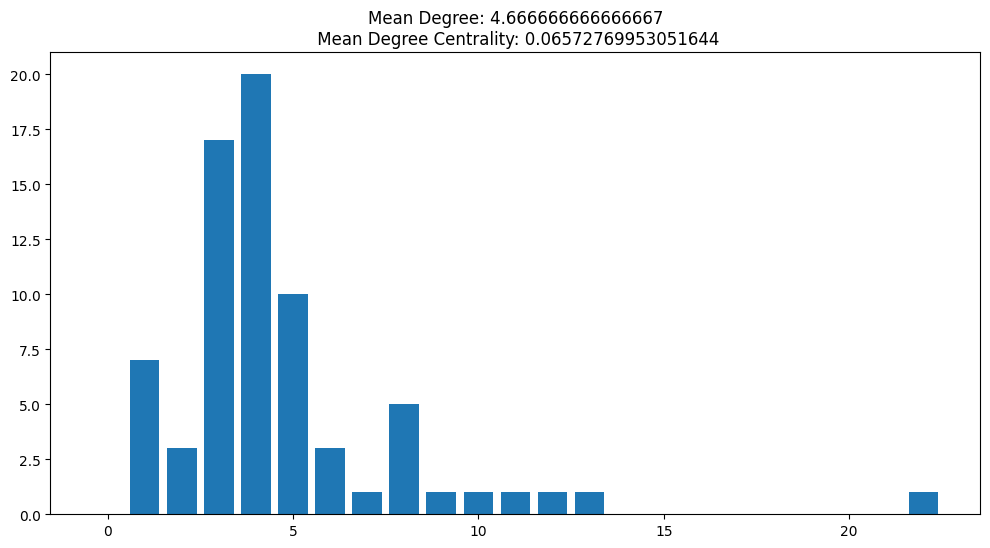

In [20]:
import matplotlib.pyplot as plt
import numpy as np

histdegree = pd.DataFrame(nx.degree_histogram(nx_graph))
degree = dict(nx.degree(nx_graph))


mean_degree = np.mean(list(degree.values()))
mean_degree_centrality = np.mean(list(nx.degree_centrality(nx_graph).values()))

fig, ax = plt.subplots(figsize=(12,6)) 
ax.bar(histdegree.index.values,histdegree[0])

plt.title("Mean Degree: {n1}\n Mean Degree Centrality: {n2}".format(n1=mean_degree,n2=mean_degree_centrality))
plt.show()

Another very useful measure is the clustering coefficient, which tells us how likely the nodes are to build clusters. This is a global measure.

In [21]:
print("Clustering coefficient: {n}".format(n=nx.average_clustering(nx_graph)))

Clustering coefficient: 0.07673306631639965


### Exercise 3

Calculate and visualise the centrality of the music graph. Use a different measure than degree. For different measures you can refer to this online [documentation]{https://networkx.org/documentation/stable/reference/algorithms/centrality.html}. Choose wisely though, some measures require a long time to calculate (like betweenness or eigenvector centrality).

As a second step, take some time to explore the documentation of networkx. Is there something other you can calculate and learn about the graph?

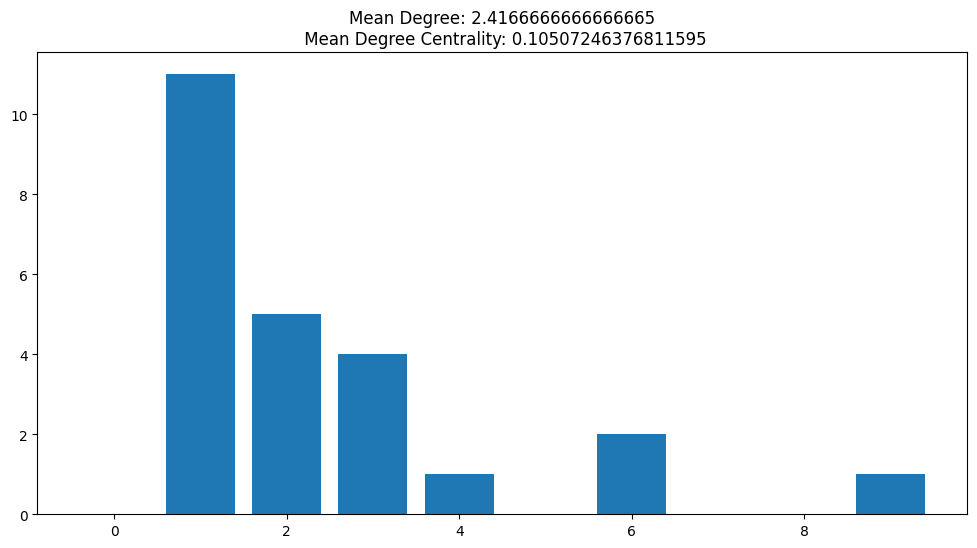

In [22]:
#your code here
#here we are plotting the ontology of the music graph
histdegree = pd.DataFrame(nx.degree_histogram(nx_music))
degree = dict(nx.degree(nx_music))
histdegree = histdegree[:10]

mean_degree = np.mean(list(degree.values()))
mean_degree_centrality = np.mean(list(nx.degree_centrality(nx_music).values()))

fig, ax = plt.subplots(figsize=(12,6)) 
ax.bar(histdegree.index.values[:10],histdegree[0])

plt.title("Mean Degree: {n1}\n Mean Degree Centrality: {n2}".format(n1=mean_degree,n2=mean_degree_centrality))
plt.show()

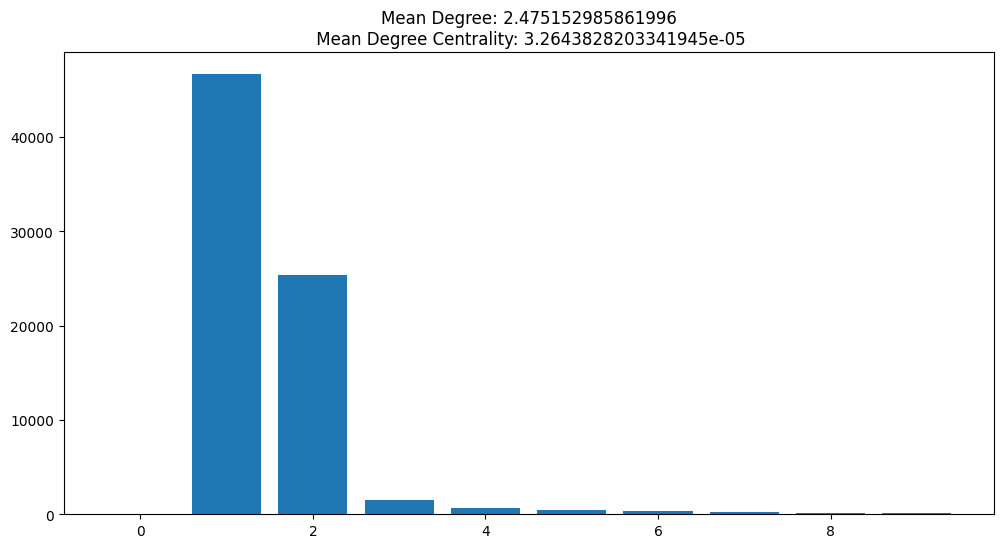

In [34]:
#here we are plotting the music graph:
##we can clearly see that there is a big imbalabce as only the first two degreeS are significantly bigger than zero
histdegree = pd.DataFrame(nx.degree_histogram(nx_music_graph))
degree = dict(nx.degree(nx_music_graph))
histdegree = histdegree[:10]

mean_degree = np.mean(list(degree.values()))
mean_degree_centrality = np.mean(list(nx.degree_centrality(nx_music_graph).values()))

fig, ax = plt.subplots(figsize=(12,6)) 
ax.bar(histdegree.index.values[:10],histdegree[0])

plt.title("Mean Degree: {n1}\n Mean Degree Centrality: {n2}".format(n1=mean_degree,n2=mean_degree_centrality))
plt.show()

In [37]:
#We can for instance compute the degree centrality: which is the fraction of the nodes it is connected to 
print(nx.degree_centrality(nx_music))




{rdflib.term.URIRef('http://test.org/myonto.owl#Location'): 0.08695652173913043, rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Thing'): 0.2608695652173913, rdflib.term.URIRef('http://test.org/myonto.owl#SoloArtist'): 0.13043478260869565, rdflib.term.URIRef('http://test.org/myonto.owl#Person'): 0.13043478260869565, rdflib.term.URIRef('http://test.org/myonto.owl#CollaboratingArtist'): 0.08695652173913043, rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Class'): 0.3913043478260869, rdflib.term.URIRef('http://test.org/myonto.owl#Member'): 0.08695652173913043, rdflib.term.URIRef('http://test.org/myonto.owl#bandMember'): 0.043478260869565216, rdflib.term.URIRef('http://www.w3.org/2002/07/owl#ObjectProperty'): 0.2608695652173913, rdflib.term.URIRef('http://test.org/myonto.owl#Artist'): 0.17391304347826086, rdflib.term.URIRef('http://test.org/myonto.owl#SubGenre'): 0.08695652173913043, rdflib.term.URIRef('http://test.org/myonto.owl#Genre'): 0.13043478260869565, rdflib.term.URIRef('http:/

In [33]:
#We can for instance compute the in-degree centrality: which is the fraction of nodes its incoming edges are connected to.
nx.in_degree_centrality(nx_music)

{rdflib.term.URIRef('http://test.org/myonto.owl#Location'): 0.0,
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Thing'): 0.2608695652173913,
 rdflib.term.URIRef('http://test.org/myonto.owl#SoloArtist'): 0.0,
 rdflib.term.URIRef('http://test.org/myonto.owl#Person'): 0.043478260869565216,
 rdflib.term.URIRef('http://test.org/myonto.owl#CollaboratingArtist'): 0.0,
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Class'): 0.3913043478260869,
 rdflib.term.URIRef('http://test.org/myonto.owl#Member'): 0.0,
 rdflib.term.URIRef('http://test.org/myonto.owl#bandMember'): 0.0,
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#ObjectProperty'): 0.2608695652173913,
 rdflib.term.URIRef('http://test.org/myonto.owl#Artist'): 0.08695652173913043,
 rdflib.term.URIRef('http://test.org/myonto.owl#SubGenre'): 0.0,
 rdflib.term.URIRef('http://test.org/myonto.owl#Genre'): 0.043478260869565216,
 rdflib.term.URIRef('http://test.org/myonto.owl#collaboratesWith'): 0.0,
 rdflib.term.URIRef('http://test.org/

## 4. Visualizing your graph

With networkX you can easily visualize your ontology/graph, no matter if they include blank nodes or not. The visualisations are powered by matplotlib. We will use here the first ontology, which also has blank nodes, but is mucy

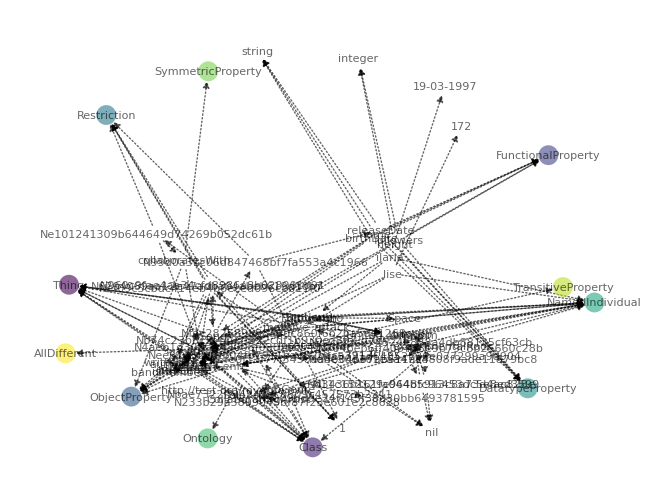

In [23]:
#Working with original ontology inferred - even tho it contains Blank nodes

music_ontology = rdflib.Graph()
music_ontology.parse("data/my_music_ontology_inferred.owl")
nx_graph = rdflib_to_networkx_digraph(music_ontology)

#rename the columns
mapping = pd.DataFrame(nx_graph.nodes())
mapping['new_names'] = mapping[0].str.split("#",n=1,expand=False)
mapping['label'] = 'NA'

mapping_copy = mapping.copy()

for ind, m in mapping_copy.iterrows():
    l = len(m['new_names'])
    names = m['new_names']
    mapping.loc[ind,'label'] = names[l-1]
#this just helps us to have the readable names and not the URIs    
map_dict = dict(zip(mapping[0],mapping['label']))

#we indeed re-label the nodes of the graph
nx_graph_nl = nx.relabel_nodes(nx_graph,map_dict,copy=True)

#we decide to color the owl properties (in this way we have the ontology interacting with the instantiated KG)
owl_classes = [str(mapping.new_names[i][1])  for i in range(len(mapping.new_names)) if re.search('http://www.w3.org/2002/07/',mapping.new_names[i][0] )]

#this is quite messy as our KG is pretty big and networkx visualization tools are not known to be the best around
nx.draw(nx_graph_nl,
                 with_labels=True, nodelist = owl_classes,node_color = [range(11)],
                node_size=200, font_size=8,alpha=0.6,linewidths=0.1,style=':' )


### Exercise 4

Try to visualize your own ontology below. Don't shy away from looking for and trying other approaches to visualize an ontology, giving nodes different colors, or varying thickness/color of the edges based on the type of relation.

DiGraph with 24 nodes and 29 edges


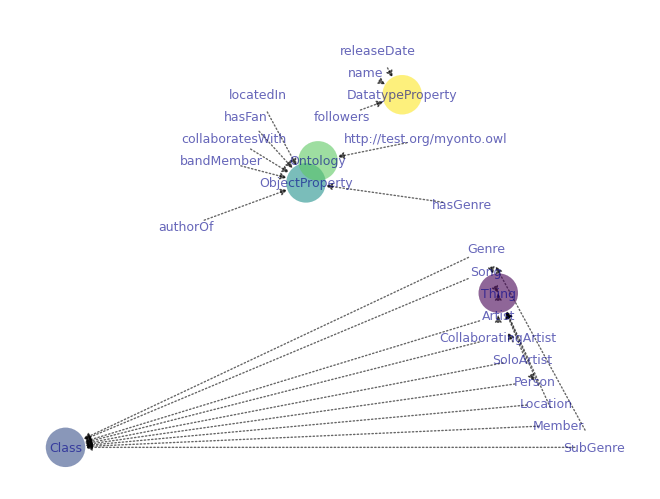

In [24]:
#Here we visualize the ontology that we enlarged with albums and all

mapping = pd.DataFrame(nx_music.nodes())
mapping['new_names'] = mapping[0].str.split("#",n=1,expand=False)

mapping['label'] = 'NA'

#store a list of the owl classes: we will color them differently for better visualization
owl_classes = [str(mapping.new_names[i][1])  for i in range(len(mapping.new_names)) if re.search('http://www.w3.org/2002/07/',mapping.new_names[i][0] )]


mapping_copy = mapping.copy()

for ind, m in mapping_copy.iterrows():
    l = len(m['new_names'])
    names = m['new_names']
    mapping.loc[ind,'label'] = names[l-1]
    
map_dict = dict(zip(mapping[0],mapping['label']))

nx_graph_nl = nx.relabel_nodes(nx_music,map_dict,copy=True)

print(nx_graph_nl)


nx.draw_planar(nx_graph_nl,
                 with_labels=True,
                node_size=800, font_size=9 , font_color = "darkblue",nodelist = owl_classes,node_color = [range(len(owl_classes))], alpha=0.6,linewidths=0.1,style=':')
# plt.draw()


## 5. Clustering

NetworkX already comes with some clustering algorithms. We will try the one introduced in the theory part of the class, Louvain clustering algorithm.

Number of found communitites 19 
 Number of nodes in the graph 72
0th community: 
 {'19-03-1997', 'ilaria', 'biffy_clyro', 'experimentalRock', 'NamedIndividual', 'Space'}
1th community: 
 {'Genre', 'locatedIn', 'Thing', 'Location', 'TransitiveProperty', 'N6d13b01431ba4188af669472f75a711b', 'Class', 'United_Kingdom', 'Scotland', 'Member', 'Edinburgh', 'massive_attack', 'SubGenre'}
2th community: 
 {'lise', '172'}
3th community: 
 {'SoloArtist', 'tricky'}
4th community: 
 {'N7d6c9dd40f9a43c7a3e1c9373b857bed', 'triphop', 'N229b95ddee674a6db673a014a24ba953'}
5th community: 
 {'bandMember', 'writtenBy', 'ObjectProperty', 'authorOf'}
6th community: 
 {'N895819cffe104eeb9282b3bfd97dc4e5', 'Neef898ea54a24cbf8c3dec53d68e8f4b', 'N71393ea7d3da4b418d66b0f816c1b825'}
7th community: 
 {'N2bf14e6cb73e4f48a04671c9c3947865', 'Restriction', 'Na5dd195b49e24eb199ff58d7a1f4edcc', '1', 'N3d67af66944d4912b976016e15b20753'}
8th community: 
 {'isFanOf', 'Person', 'hasFan'}
9th community: 
 {'pop', 'N336e85d2c6

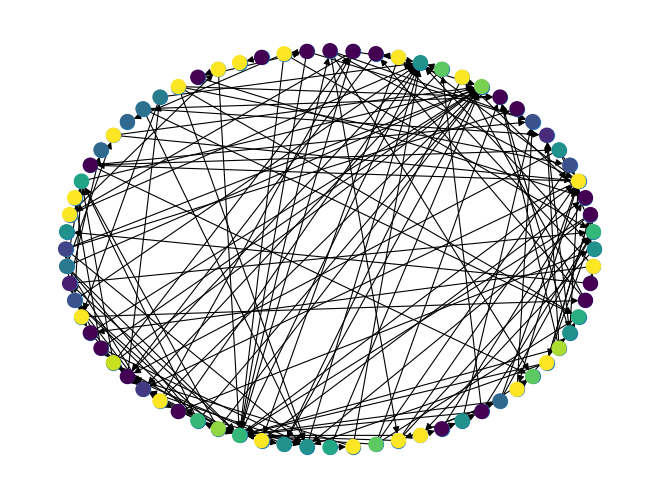

In [25]:
#work with the original inferred ontology

music_ontology = rdflib.Graph()
music_ontology.parse("data/my_music_ontology_inferred.owl")
nx_graph = rdflib_to_networkx_digraph(music_ontology)

mapping = pd.DataFrame(nx_graph.nodes())
mapping['new_names'] = mapping[0].str.split("#",n=1,expand=False)
mapping['label'] = 'NA'

mapping_copy = mapping.copy()

for ind, m in mapping_copy.iterrows():
    l = len(m['new_names'])
    names = m['new_names']
    mapping.loc[ind,'label'] = names[l-1]
#this just helps us to have the readable names and not the URIs    
map_dict = dict(zip(mapping[0],mapping['label']))

nx_graph_nl = nx.relabel_nodes(nx_graph,map_dict,copy=True)

#we print all the communities to get a clearer idea of whatsuppp
communities = nx_comm.louvain_communities(nx_graph_nl,resolution=1) #resolution: high number favor small communitites, low favor large communities
print('Number of found communitites', len(communities),
'\n Number of nodes in the graph',nx.number_of_nodes(nx_graph_nl))
for i in range(len(communities)):
    print(f'{i}th community: \n',communities[i] )
    

pos = nx.shell_layout(nx_graph_nl)
nx.draw(nx_graph_nl, pos, edge_color='k',font_weight='light', 
        node_size= 100, width= 0.8)

for com in communities:
       nx.draw_networkx_nodes(nx_graph_nl,
                           pos,
                           nodelist=com, 
                           #node_color=np.random.rand(3,),
                           node_color = range(len(com)),
                           label=True,
                           node_size=100)    



    

In [ ]:
for com in communities:
    nx.draw(nx_graph_nl, with_labels=True,
                node_size=800, font_size=9 , font_color = "darkblue",nodelist = com, node_color=range(len(com)),alpha=0.6,linewidths=0.1,style=':')
plt.draw()



We can clearly see that visualizing all together gets quite messy: let's visualize community by community

In [ ]:
nx.draw(nx_graph_nl, with_labels=True,
                node_size=800, font_size=5 , font_color = "darkblue",nodelist = communities[1],alpha=0.6,linewidths=0.1,style=':')
plt.draw()

The visualization is still quite messy as there are many nodes to work with.
Here we do cluster and visualization of the ontology only (which has indeed less nodes)

In [26]:
#work with music ontology only
import networkx.algorithms.community as nx_comm
#Find the communities
nx_graph_nl = nx.relabel_nodes(nx_music,map_dict,copy=True)
communities = nx_comm.louvain_communities(nx_graph_nl,resolution=1) #resolution: high number favor small communitites, low favor large communities
print('Number of found communitites', len(communities),
'\n Number of nodes in the graph',nx.number_of_nodes(nx_graph_nl))

#Print the member of each community: can try and reason on the semantic value of that
for i in range(len(communities[:10])):
    print(f'{i}th community: \n',communities[i] )

Number of found communitites 7 
 Number of nodes in the graph 24
0th community: 
 {'Song', 'Member', 'Thing', 'Location', 'Class'}
1th community: 
 {'SoloArtist', 'Person'}
2th community: 
 {'CollaboratingArtist', 'Artist'}
3th community: 
 {'hasGenre', 'locatedIn', 'ObjectProperty', 'bandMember', 'hasFan', 'collaboratesWith', 'authorOf'}
4th community: 
 {'SubGenre', 'Genre'}
5th community: 
 {'http://test.org/myonto.owl', 'Ontology'}
6th community: 
 {'DatatypeProperty', 'name', 'releaseDate', 'followers'}


Now we can visualize the graph and the communities within it. Alternatively you can also visualize a community as an example alone.

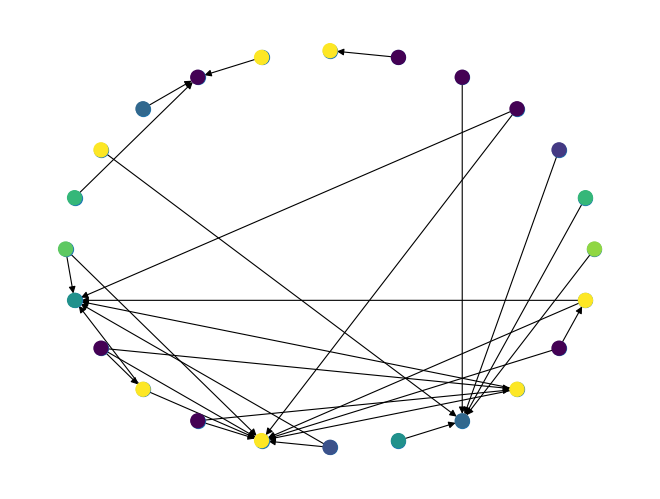

In [27]:
pos = nx.shell_layout(nx_graph_nl)
nx.draw(nx_graph_nl, pos, edge_color='k',font_weight='light', 
        node_size= 100, width= 0.8)

for com in communities:
       nx.draw_networkx_nodes(nx_graph_nl,
                           pos,
                           nodelist=com, 
                           node_color=range(len(com)),
                           label=True,
                           node_size=100)


                           

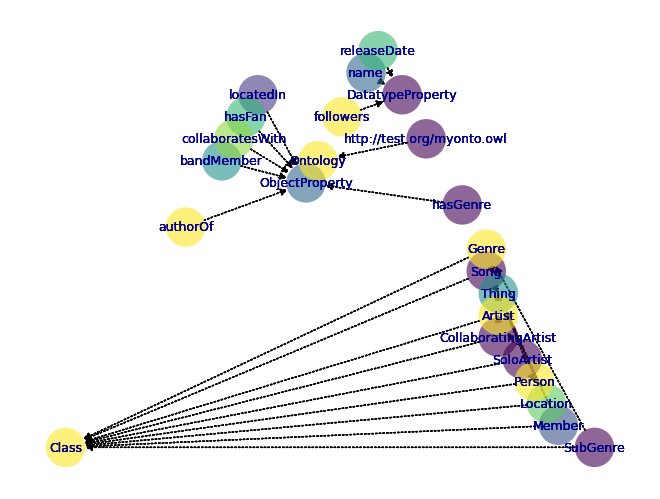

In [28]:

for com in communities:
    nx.draw_planar(nx_graph_nl, with_labels=True,
                node_size=800, font_size=9 , font_color = "darkblue",nodelist = com, node_color=range(len(com)),alpha=0.6,linewidths=0.1,style=':')
# plt.draw()

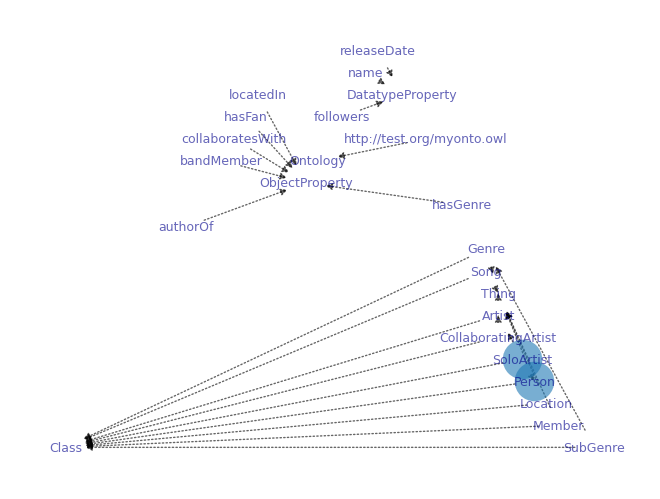

In [29]:
#we can highlight each community at a time - change the value of parameter nodelist

nx.draw_planar(nx_graph_nl, with_labels=True,
                node_size=800, font_size=9 , font_color = "darkblue",nodelist = communities[1],alpha=0.6,linewidths=0.1,style=':')
# plt.draw()

If clustering is successful and helpful is very dependent on your graph. It is beneficial to remove the information from your graph that is not helpful for the clustering, like the T-box of your ontology, as this "polutes" the graph. The clustering algorithm is not made for knowledge graphs but rather for mathematical graphs, hence less semantics is better.

In the case of the inferred ontology (nx_graph), the graph is not dense enough to produce meaningful clusters, which is why there are 38706 clusters. 
